### naver REST API
- https://developers.naver.com
- 통합검색어 트렌드 api
- 파파고 번역 api

#### 1. 통합검색어 트렌드
- 네이버 데이터랩(https://datalab.naver.com/)
    1. 애플리케이션 등록
        - client_id, client_secret
    2. 요청 및 응답
    3. 데이터 전처리
    4. 그래프 그리기

In [1]:
import json

In [2]:
# 애플리케이션 등록
client_id = 'client_id'
client_secret = 'client_secret'

In [3]:
# 요청 및 응답
url = 'https://openapi.naver.com/v1/datalab/search'

In [4]:
params = {
    'startDate': '2018-01-01',
    'endDate': '2020-03-02',
    'timeUnit': 'week',
    'keywordGroups': [
        {'groupName': '서울숲', 'keywords': ['서울숲', '서울공원']},
        {'groupName': '선유도공원', 'keywords': ['선유도공원', '선유도']},
        {'groupName': '뚝섬한강공원', 'keywords': ['뚝섬한강공원', '뚝섬유원지', '뚝섬한강', '건대한강']}],
    'device': 'mo',
    'ages': ['3', '4', '5', '6'] # 20 ~ 30 대
}

In [5]:
json.dumps(params)

'{"startDate": "2018-01-01", "endDate": "2020-03-02", "timeUnit": "week", "keywordGroups": [{"groupName": "\\uc11c\\uc6b8\\uc232", "keywords": ["\\uc11c\\uc6b8\\uc232", "\\uc11c\\uc6b8\\uacf5\\uc6d0"]}, {"groupName": "\\uc120\\uc720\\ub3c4\\uacf5\\uc6d0", "keywords": ["\\uc120\\uc720\\ub3c4\\uacf5\\uc6d0", "\\uc120\\uc720\\ub3c4"]}, {"groupName": "\\ub69d\\uc12c\\ud55c\\uac15\\uacf5\\uc6d0", "keywords": ["\\ub69d\\uc12c\\ud55c\\uac15\\uacf5\\uc6d0", "\\ub69d\\uc12c\\uc720\\uc6d0\\uc9c0", "\\ub69d\\uc12c\\ud55c\\uac15", "\\uac74\\ub300\\ud55c\\uac15"]}], "device": "mo", "ages": ["3", "4", "5", "6"]}'

In [6]:
headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': client_id, 
    'X-Naver-Client-Secret': client_secret,     
}

In [7]:
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [8]:
# 데이터 전처리
datas = response.json()['results']

In [9]:
dfs = []
for data in datas:
    df = pd.DataFrame(data['data'])
    df['title'] = data['title']
    dfs.append(df)
    
result_df = pd.concat(dfs, ignore_index=True)
result_df.tail()

,period,ratio,title
337,2020-02-03,2.30949,뚝섬한강공원
338,2020-02-10,4.64915,뚝섬한강공원
339,2020-02-17,3.88219,뚝섬한강공원
340,2020-02-24,5.60785,뚝섬한강공원
341,2020-03-02,0.89406,뚝섬한강공원


In [10]:
pivot_df = result_df.pivot('period', 'title', 'ratio')
pivot_df.tail(2)

title,뚝섬한강공원,서울숲,선유도공원
period,,,
2020-02-24,5.60785,13.96040,6.57948
2020-03-02,0.89406,2.08113,0.70232


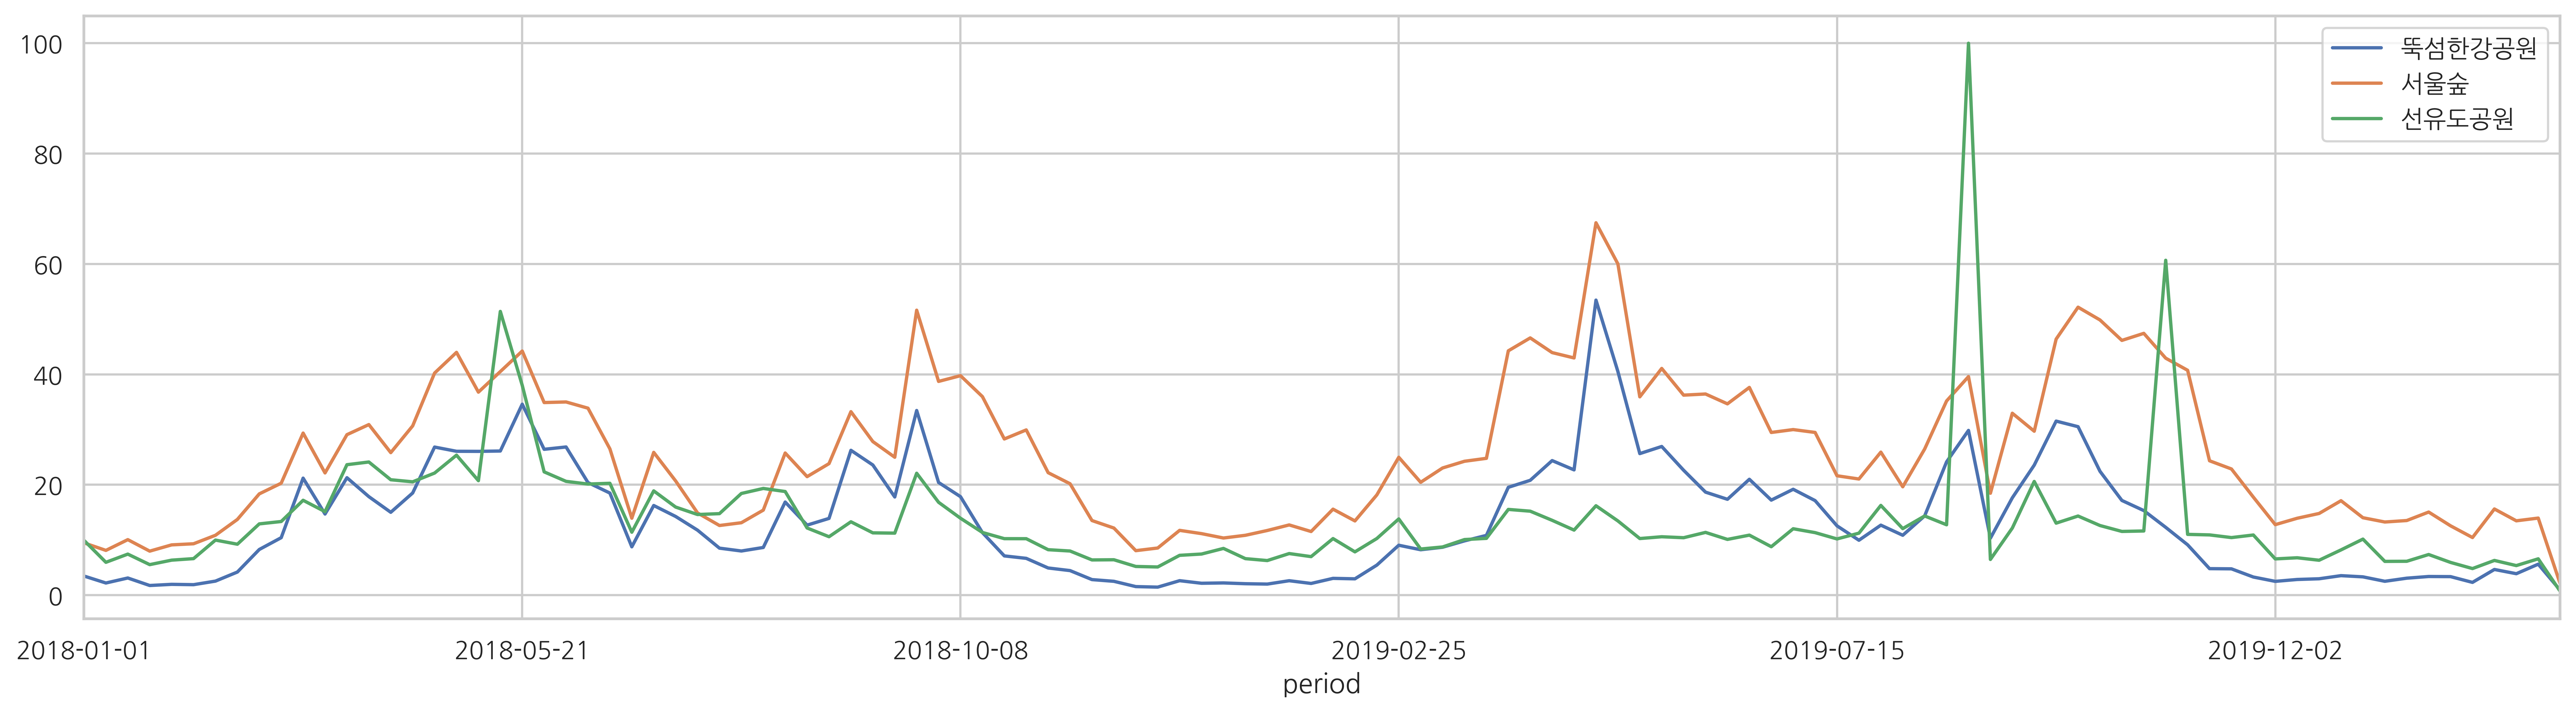

In [32]:
# 그래프로 그리기
pivot_df.plot(figsize=(20, 5))
plt.legend(loc=0)
plt.show()

#### 2. 파파고 api

In [11]:
url = 'https://openapi.naver.com/v1/papago/n2mt'

In [12]:
params = {
    'source': 'en',
    'target': 'ko',
    'text': "I can't remember anything without you."
}

In [13]:
headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret,
}

In [14]:
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [41]:
response.json()['message']['result']['translatedText']

'너 없이는 아무것도 기억나지 않아.'

### kakao REST API
- https://developers.kakao.com/
- 주소값으로 위도, 경도, 우편번호 가져오기
- 카카오 번역
- 카카오톡 메세지 보내기

#### 1. 카카오 로컬 API

In [15]:
app_key = 'app_key'

In [16]:
headers = {'Authorization': f'KakaoAK {app_key}'}

In [17]:
query = '서울 성동구 성수이로 113'

In [18]:
url = f'https://dapi.kakao.com/v2/local/search/address.json?query={query}'

In [19]:
response = requests.get(url, headers=headers)
response

<Response [200]>

In [20]:
data = response.json()['documents'][0]
data

{'address': {'address_name': '서울 성동구 성수동2가 289-10',
  'b_code': '1120011500',
  'h_code': '1120069000',
  'main_adderss_no': '289',
  'main_address_no': '289',
  'mountain_yn': 'N',
  'region_1depth_name': '서울',
  'region_2depth_name': '성동구',
  'region_3depth_h_name': '성수2가3동',
  'region_3depth_name': '성수동2가',
  'sub_adderss_no': '10',
  'sub_address_no': '10',
  'x': '127.057127702049',
  'y': '37.5451422412538',
  'zip_code': '133834'},
 'address_name': '서울 성동구 성수이로 113',
 'address_type': 'ROAD_ADDR',
 'road_address': {'address_name': '서울 성동구 성수이로 113',
  'building_name': '제강빌딩',
  'main_building_no': '113',
  'region_1depth_name': '서울',
  'region_2depth_name': '성동구',
  'region_3depth_name': '성수동2가',
  'road_name': '성수이로',
  'sub_building_no': '',
  'undergroun_yn': 'N',
  'underground_yn': 'N',
  'x': '127.057127702049',
  'y': '37.5451422412538',
  'zone_no': '04794'},
 'x': '127.057127702049',
 'y': '37.5451422412538'}

In [20]:
lat, lng, zip_code = data['x'], data['y'], data['address']['zip_code']
lat, lng, zip_code

('127.05700006240183', '37.5454425158365', '133834')

#### 2. 카카오 번역 API

In [21]:
params = {
    'query': "I can't remember anything without you.",
    'src_lang': 'en',
    'target_lang': 'kr'
}
headers = {'Authorization': f'KakaoAK {app_key}'}

In [22]:
url = 'https://kapi.kakao.com/v1/translation/translate?query={}&src_lang={}&target_lang={}'.format(params['query'], params['src_lang'], params['target_lang'])

In [23]:
response = requests.get(url, headers=headers)
response

<Response [200]>

In [24]:
response.json()['translated_text'][0][0]

'너 없이는 아무것도 기억할 수 없어.'

#### 3. 카카오톡 메시지 전송하기 
- app_id, app_key -> authorize_code
- authorize_code -> access_token

In [25]:
app_id = 'app_id'
app_key = 'app_key'
redirect_uri = 'https://naver.com'

In [26]:
# authorize_code 받기
host = 'kauth.kakao.com'
url = f'https://{host}/oauth/authorize?client_id={app_key}&redirect_uri={redirect_uri}&response_type=code'

In [52]:
# print(url)

In [29]:
authorize_code = 'authorize_code'

In [30]:
url = f'https://{host}/oauth/token'
params = {
    'grant_type': 'authorization_code',
    'client_id': app_key,
    'redirect_uri': redirect_uri,
    'code': authorize_code
}
# params

In [31]:
response = requests.post(url, params)
response

<Response [200]>

In [44]:
data = response.json()
# data

In [34]:
access_token = data['access_token']

#### 4. 프로필데이터 가져오기

In [47]:
url = 'https://kapi.kakao.com/v1/api/talk/profile'
headers = {'Authorization': f'Bearer {access_token}'}

In [48]:
response = requests.get(url, headers=headers)
response

<Response [200]>

In [50]:
# response.json()

In [51]:
%%html
<img src='profileImageURL'>

In [39]:
# 카카오톡 메시지 전송하기

In [41]:
host = 'kapi.kakao.com'
url = f'https://{host}/v2/api/talk/memo/default/send'
headers = {
    'Content-Type': "application/x-www-form-urlencoded",
    'Cache-Control': "no-cache",
    'Authorization': f'Bearer {access_token}'
}
params = {
    'object_type': 'text',
    'text': '클릭하지마세요 https://daum.net',
    'link': {
        "web_url": "https://naver.com",
        "mobile_web_url": "https://m.naver.com",
        },
    'button_title': '바로확인',
    }

In [42]:
payload = 'template_object=' + str(json.dumps(params))
response = requests.post(url, payload, headers=headers)
response

<Response [200]>

In [43]:
response.text

'{"result_code":0}'